## Dataset Super Market Customer
[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)

---


---



---




### We will call several libraries that will be used later

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/pelanggan_supermarket (2).csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Statistika Deskriptif

We will conduct data exploration using descriptive statistics, utilizing pandas to obtain summary statistics.

In [ ]:
#code here
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

analysis:

Data Summary:
Total Data Count: There are 250 total customer data.

Customer Age:
The average age of customers is approximately 38.73 years. The age standard deviation is around 14.33 years. The minimum customer age is 18 years, while the maximum age is 120 years. There are 5 data points without age information (missing values) due to the presence of only 245 values in the column.

Yearly Income:
The average yearly income of customers is about 64.74 million. The yearly income standard deviation is around 25.11 million. The minimum yearly income of customers is 15 million, while the maximum yearly income is 137 million.

Shopping Score:
The average shopping score of customers is approximately 50.33. The shopping score standard deviation is around 28.67. The minimum shopping score of customers is 3, while the maximum score is 150. There are 4 data points without shopping score information (missing values) due to the presence of only 246 values in the column.



---



---



---



# Handling missing value

In [ ]:
#code here
df.isnull().sum()
df = df.fillna(method='ffill')
missing_values = df.isnull().sum()
print(missing_values)

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB




---



---



---



# Handling outlier

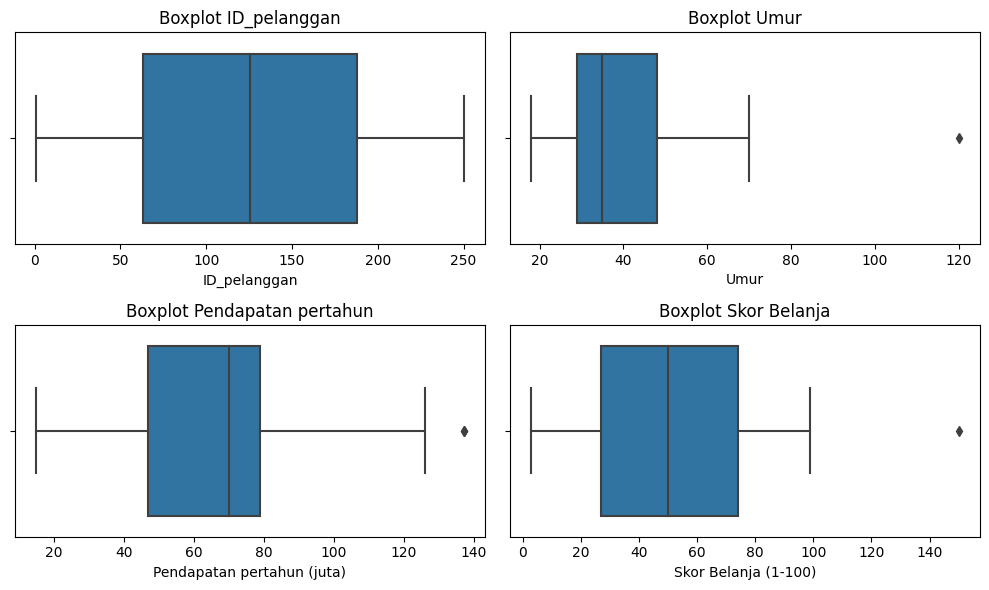

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['ID_pelanggan'])
plt.title('Boxplot ID_pelanggan')
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Umur'])
plt.title('Boxplot Umur')
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Pendapatan pertahun (juta)'])
plt.title('Boxplot Pendapatan pertahun')
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Skor Belanja (1-100)'])
plt.title('Boxplot Skor Belanja')
plt.tight_layout()
plt.show()



**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)

In [ ]:
Q1 = np.percentile(df['ID_pelanggan'], 25)
Q3 = np.percentile(df['ID_pelanggan'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['ID_pelanggan'] >= lower_bound) & (df['ID_pelanggan'] <= upper_bound)]

Q1 = np.percentile(df['Umur'], 25)
Q3 = np.percentile(df['Umur'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Umur'] >= lower_bound) & (df['Umur'] <= upper_bound)]

Q1 = np.percentile(df['Pendapatan pertahun (juta)'], 25)
Q3 = np.percentile(df['Pendapatan pertahun (juta)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Pendapatan pertahun (juta)'] >= lower_bound) & (df['Pendapatan pertahun (juta)'] <= upper_bound)]

Q1 = np.percentile(df['Skor Belanja (1-100)'], 25)
Q3 = np.percentile(df['Skor Belanja (1-100)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Skor Belanja (1-100)'] >= lower_bound) & (df['Skor Belanja (1-100)'] <= upper_bound)]

df2 = df.copy()
df2 = df2.dropna()

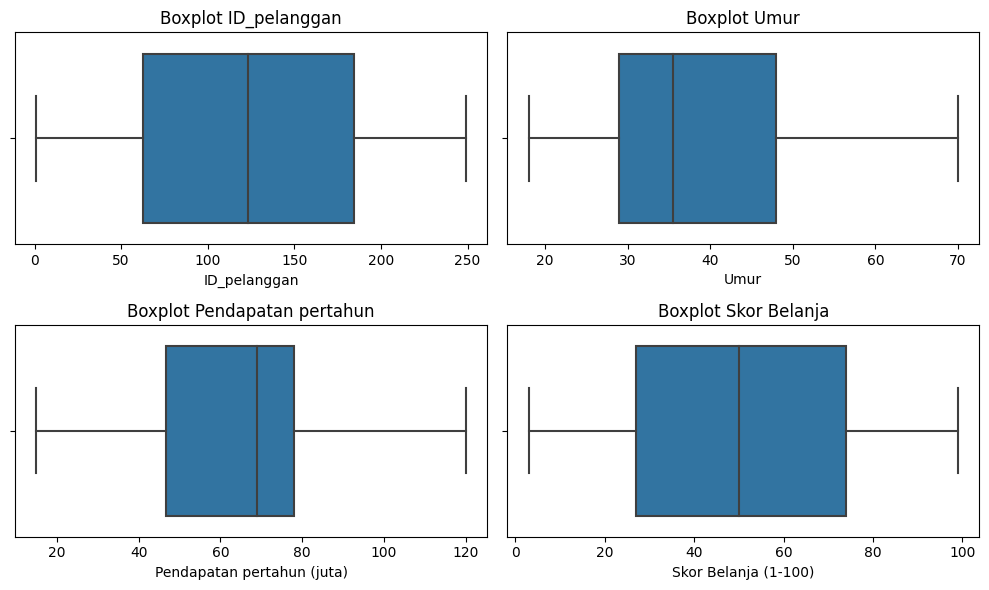

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['ID_pelanggan'])
plt.title('Boxplot ID_pelanggan')
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Umur'])
plt.title('Boxplot Umur')
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Pendapatan pertahun (juta)'])
plt.title('Boxplot Pendapatan pertahun')
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Skor Belanja (1-100)'])
plt.title('Boxplot Skor Belanja')
plt.tight_layout()
plt.show()



---



---



---



# statistika Inferential



We will conduct a hypothesis test on a sample of 100 visitors to the supermarket. The initial hypothesis is that the average age of supermarket visitors is above 35 years. We will use the classical technique of z-testing and calculate the probability p-value.

We will use the dataframe variable resulting from previous handling of missing values and outliers.
Previously, we converted the data type of the Age column to integer using the .astype() method.




In [ ]:
df_100 = df2.sample(100,  random_state=1)
df2['Umur'] = df2['Umur'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 248
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                244 non-null    int64  
 1   Jenis Kelamin               244 non-null    object 
 2   Umur                        244 non-null    int64  
 3   Pendapatan pertahun (juta)  244 non-null    int64  
 4   Skor Belanja (1-100)        244 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.4+ KB


In [ ]:
#code here for z-test
from scipy.stats import norm
mean_h0 = 35
alpha = 0.05
sample_mean = np.mean(df2)
sample_std = np.std(df2, ddof=1)
n = len(df2)
z_score = (sample_mean - mean_h0) / (sample_std / np.sqrt(n))
z_critical = norm.ppf(1 - alpha)
print('Nilai z-score:', z_score)
print('Nilai kritis z:', z_critical)

Nilai z-score: ID_pelanggan                  19.411407
Umur                           3.921727
Pendapatan pertahun (juta)    18.954643
Skor Belanja (1-100)           8.424942
dtype: float64
Nilai kritis z: 1.6448536269514722


In [ ]:
#code here for p-value
p_value = 1 - norm.cdf(z_score)
print('Nilai p-value:', p_value)

Nilai p-value: [0.00000000e+00 4.39583568e-05 0.00000000e+00 0.00000000e+00]


analysis:

The customer ID has a z-score value of 19.411407, which is much larger than the critical z-value of 1.6448536269514722. Age has a z-score value of 3.921727, also significantly higher than the critical z-value. Yearly income (in million) has a z-score value of 18.954643, which is also much larger than the critical z-value. Shopping score (1-100) has a z-score value of 8.424942, significantly exceeding the critical z-value. Based on the calculated p-values, we can draw the following conclusions:

All resulting p-values are very small (p-value < 0.0001), indicating substantial evidence to reject the null hypothesis. Therefore, we can conclude that the average age of supermarket visitors, customer ID, yearly income, and shopping score are all above 35 years (based on the alternative hypothesis). In this context, the hypothesis test results indicate that the average age of supermarket visitors and the other variables are significantly greater than 35 years.



---



---



---



## EDA

Kita akan melakukan eksplorasi data analisis. menggunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

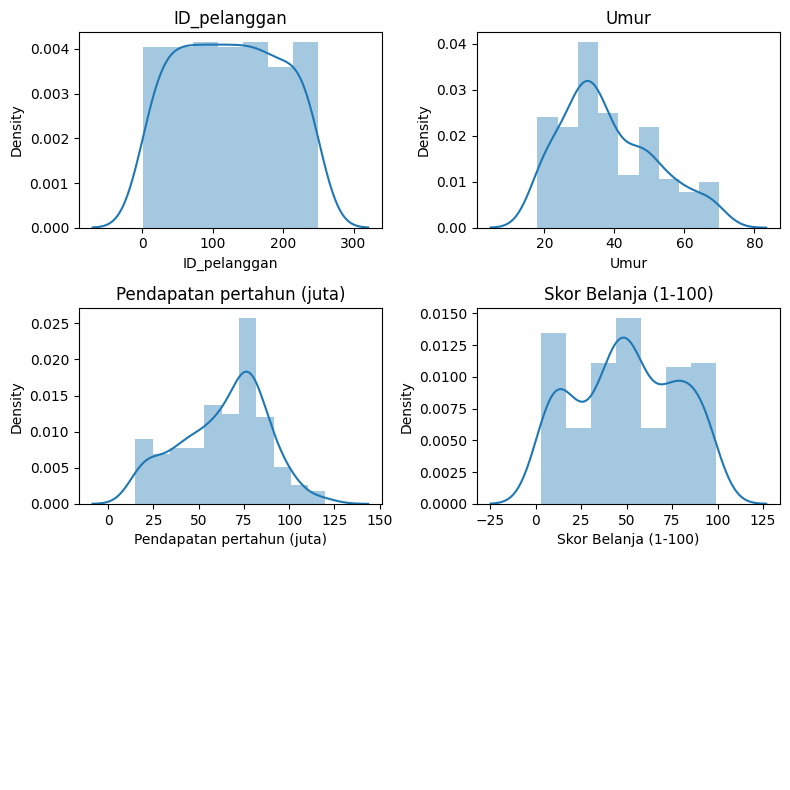

In [ ]:
#code here for univariate
fig, axs = plt.subplots(3, 2, figsize=(8, 8))
sns.distplot(df2['ID_pelanggan'], ax=axs[0, 0])
axs[0, 0].set_title('ID_pelanggan')
sns.distplot(df2['Umur'], ax=axs[0, 1])
axs[0, 1].set_title('Umur')
sns.distplot(df2['Pendapatan pertahun (juta)'], ax=axs[1, 0])
axs[1, 0].set_title('Pendapatan pertahun (juta)')
sns.distplot(df2['Skor Belanja (1-100)'], ax=axs[1, 1])
axs[1, 1].set_title('Skor Belanja (1-100)')
axs[2, 0].axis('off')
axs[2, 1].axis('off')
plt.tight_layout()
plt.show()

analysis:

Customer ID: The data distribution in the Customer ID column appears to be uniform with slight variation. The histogram indicates that each customer ID has nearly the same frequency.

Age: The data distribution in the Age column seems to be somewhat symmetrical with a peak around 30-40 years. The histogram shows that the number of supermarket visitors is relatively high within this age group.

Yearly Income (in million): The data distribution in the Yearly Income column appears to be skewed to the right. This suggests that a majority of supermarket visitors have relatively lower incomes. The histogram shows that the frequency of visitors is higher within the lower income range.

Shopping Score (1-100): The data distribution in the Shopping Score column appears fairly symmetrical with a peak around the value of 40-60. This indicates that most visitors have moderate shopping scores. The histogram reveals that the frequency of visitors is higher within this range of shopping scores.

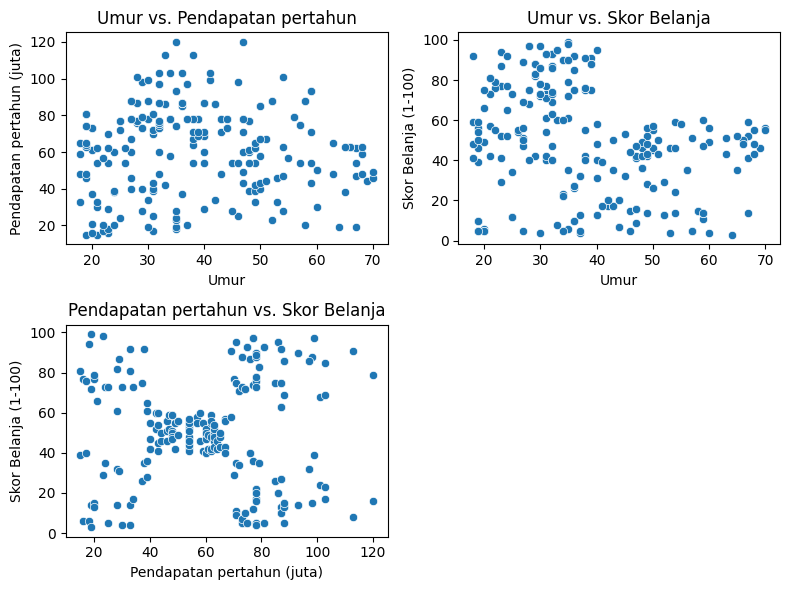

In [ ]:
#code here for bivariate
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
sns.scatterplot(x='Umur', y='Pendapatan pertahun (juta)', data=df2, ax=axs[0, 0])
axs[0, 0].set_title('Umur vs. Pendapatan pertahun')
sns.scatterplot(x='Umur', y='Skor Belanja (1-100)', data=df2, ax=axs[0, 1])
axs[0, 1].set_title('Umur vs. Skor Belanja')
sns.scatterplot(x='Pendapatan pertahun (juta)', y='Skor Belanja (1-100)', data=df2, ax=axs[1, 0])
axs[1, 0].set_title('Pendapatan pertahun vs. Skor Belanja')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

analysis:

Age vs. Yearly Income: This visualization illustrates the relationship between the age of visitors and their yearly income. It's apparent that there isn't a clear pattern between these two variables. The data points are scattered across various age and income ranges, without a consistent relationship.

Age vs. Shopping Score: This visualization shows the relationship between the age of visitors and their shopping score. There seems to be no strong correlation between age and shopping score. The data points are scattered randomly and do not form a clearly discernible pattern.

Yearly Income vs. Shopping Score: This visualization displays the relationship between yearly income and shopping score. A trend is visible indicating that higher yearly incomes tend to be associated with higher shopping scores. However, there is still significant variation within each income range, preventing a strong conclusion from being drawn.

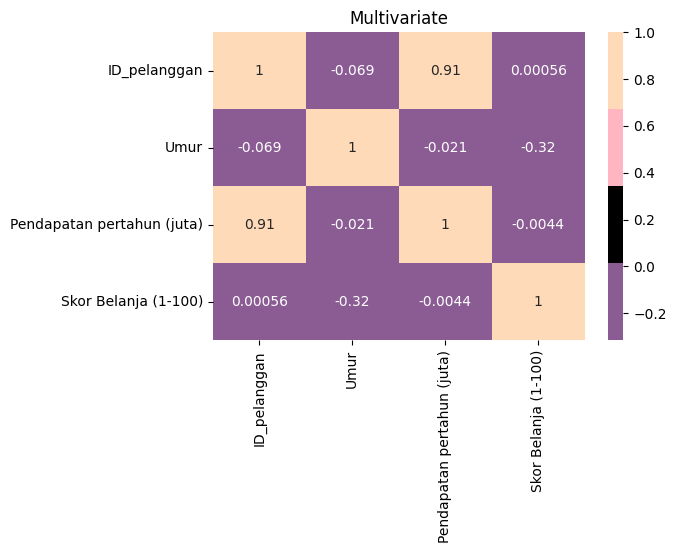

In [ ]:
#code here for multivariate
corr_matrix = df2.corr()
custom_palette = ["#8B5C94", "black", "#FFB6C1", "#FFDAB9"]
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap=custom_palette)
plt.title('Multivariate')
plt.show()

analysis:

The comparison between age and shopping score seems to have a relatively low correlation, as indicated by the darker color shade in the chart. The correlation between yearly income and shopping score appears to be relatively stronger compared to the previous correlation (age and shopping score). A more positive trend can be observed between shopping score and customer ID, suggesting that customers at the restaurant are relatively stable.



---

---



---





# Data scaling

In [ ]:
#code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_to_scale = df2[['Umur', 'Skor Belanja (1-100)']]
scaled_data = scaler.fit_transform(data_to_scale)
df2_scaled = pd.DataFrame(scaled_data, columns=['Umur', 'Skor Belanja  (1-100)'])
df2_scaled.head()

,Umur,Skor Belanja (1-100)
0,-1.450802,-0.396061
1,-1.300899,1.120127
2,-1.375851,-1.587352
3,-1.150996,0.975728
4,-0.551385,-0.359962




---



---



---



# Clustering menggunakan k-menas

* Performing clustering using k-means clustering with k=2, and visualizing the results.
* Utilizing the Elbow method to find the appropriate number of clusters (k).
8 Applying k=3 and then visualizing the outcomes.
Calculating the silhouette coefficient for both of these clustering predictions.

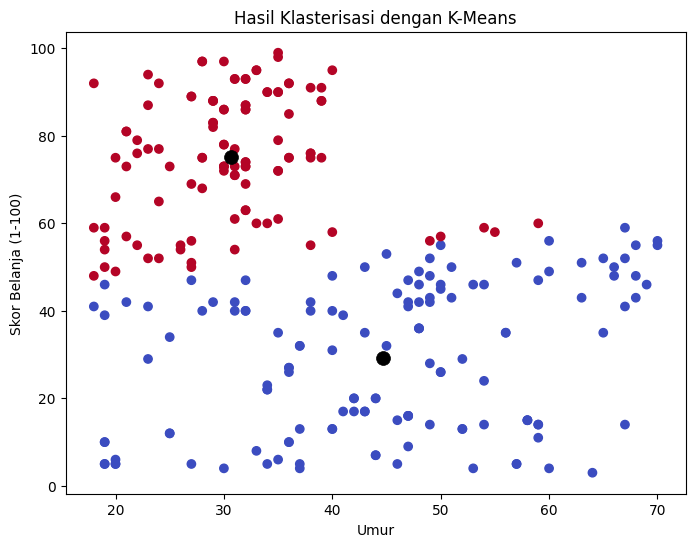

In [ ]:
#code here
from sklearn.cluster import KMeans

data_for_clustering = df2[['Umur', 'Skor Belanja (1-100)']]
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_for_clustering)
labels = kmeans.labels_
df2['Cluster'] = labels
plt.scatter(df2['Umur'], df2['Skor Belanja (1-100)'], c=df2['Cluster'], cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='o', s=100, edgecolor='black', linewidth=0.5)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('Hasil Klasterisasi dengan K-Means')
plt.show()

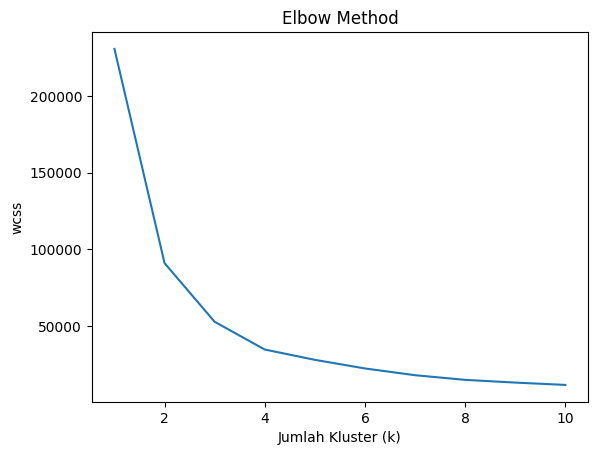

In [ ]:
#code here
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2[['Umur', 'Skor Belanja (1-100)']])
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

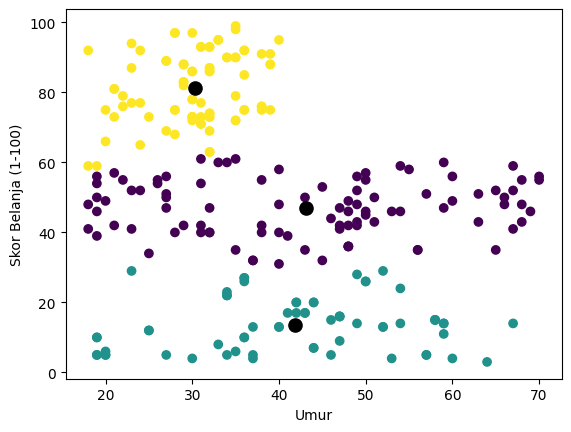

In [ ]:
#code here
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df2[['Umur', 'Skor Belanja (1-100)']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(df2['Umur'], df['Skor Belanja (1-100)'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='o', s=90)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [ ]:
#silhoutte score
from sklearn.metrics import silhouette_score
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(df2[['Umur', 'Skor Belanja (1-100)']])
labels2 = kmeans2.labels_
silhouette_score_2 = silhouette_score(df2[['Umur', 'Skor Belanja (1-100)']], labels2)
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(df2[['Umur', 'Skor Belanja (1-100)']])
labels3 = kmeans3.labels_
silhouette_score_3 = silhouette_score(df2[['Umur', 'Skor Belanja (1-100)']], labels3)
print("Silhouette Coefficient (k=2):", silhouette_score_2)
print("Silhouette Coefficient (k=3):", silhouette_score_3)

Silhouette Coefficient (k=2): 0.5028194097989681
Silhouette Coefficient (k=3): 0.4825282709883241




---



---



---



# Analyze clustering result

Based on the clustering results conducted, we can perform customer segmentation analysis for the supermarket's target market. This visualization uses the variables Age and Shopping Score (1-100) for clustering.

Clustering with k=2: Two customer segments are identified: Segment A and Segment B. Segment A is characterized by younger age and lower shopping scores, while Segment B is characterized by older age and higher shopping scores. Segment A can be seen as customers with growth potential in terms of increasing their shopping scores. Segment B can be considered as more established customers with a tendency to make larger purchases.

Clustering with k=3: Three customer segments are identified: Segment A, Segment B, and Segment C. Segment A is characterized by younger age and lower shopping scores. Segment B is characterized by moderate age and shopping scores. Segment C is characterized by older age and higher shopping scores. Segment A may require more marketing efforts to increase their shopping scores. Segment B represents stable customers with moderate shopping activity. Segment C presents a potential target market with a capacity for larger purchases. This customer segmentation analysis can be used to design more effective marketing strategies. For instance, for Segment A, the supermarket can focus on attracting younger customers and encouraging them to increase their shopping activities. Meanwhile, for Segment C, the supermarket can provide exclusive services and targeted promotions to enhance the loyalty of well-established customers.